<a href="https://colab.research.google.com/github/jacksone1/DataSci/blob/main/Unit9Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U datasets
from datasets import load_dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 1

In [ ]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import OrderedDict

The many components and interactions with a Super Mario Maker 2 level are interrelated in many complex ways. The aspects of a level can be considered as either an inherent characteristic, such as time limit, or a player-dependent characteristic, such as number of likes. The goal of this project is to use a neural network to predict how players will interact with a level based on its inherent characteristics.

# Data

Here, level data is gathered and placed in a Pandas dataframe.

In [ ]:
#Read Mario Maker data
mario_levels = load_dataset("TheGreatRambler/mm2_level", streaming=True, split="train")
#Shuffle data
shuffled_levels = mario_levels.shuffle(buffer_size=1_000, seed=52) #Seed generated 2025-05-02 19:04:10 UTC
#Get the data as a list to iterate over
sample = list(shuffled_levels.take(1000))
#Create a dictionary to hold level data
level_data_dict = {}
keys = sample[0].keys()
for k in keys:
  level_data_dict[k] = []
#For each element of the list, record the relevant level data
for i in range(0, 1000):
  for k in keys:
    level_data_dict[k].append(sample[i][k])
#Convert the dictionary to a pandas dataframe
level_data_df = pd.DataFrame(level_data_dict)
#Display the dataframe
level_data_df

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/196 [00:00<?, ?it/s]

dataset_infos.json:   0%|          | 0.00/5.51k [00:00<?, ?B/s]

data_id                              name  \
0    26044930           2-1 encendido y apagado   
1    26044536                               Me!   
2    26044124                            what??   
3    26044489                   Airship Blowup!   
4    26044367                 skipsqueak doom 3   
..        ...                               ...   
995  26044477                Snowy Adventure 2!   
996  26043816                         Boss Rush   
997  26045386  pipioǳǳǳǳǳǳǳǳǳǳǳǳǳǳǳǳǳǳǳǳǳǳǳǳǳǳǳ   
998  26045154                      Find the key   
999  26044406                             épico   

                                           description    uploaded  \
0           nivel clásico de mario 3 con giro al final  1609025657   
1     Please play my other level the key to the temple  1609024957   
2                                                stran  1609024244   
3                                                       1609024880   
4                                                       1609024671   
..                                                 ...         ...   
995                                                     1609024858   
996                                                     1609023735   
997                                  ċċċċċċċċċċċċċċċċċ  1609026499   
998  Destruct the boxes and find 2 keys and there i...  1609026048   
999           muy dificil,solo lo recomiendo para pros  1609024745   

        created  gamestyle  theme  difficulty  tag1  tag2  ...  \
0    1609003740          1      0           1    12    15  ...   
1    1608999120          3      0           0     4    14  ...   
2    1609027740          2      1           0    11    13  ...   
3    1608752580          4      3           1     6     7  ...   
4    1608995760          4      9           0     0     0  ...   
..          ...        ...    ...         ...   ...   ...  ...   
995  1602383400          3      6           0     1     8  ...   
996  1607913240          3      3           1     8    13  ...   
997  1609010760          4      0           1     7     8  ...   
998  1609003260          4      0           1    11    14  ...   
999  1609027980          2      9           1     6    13  ...   

             uploader_pid   first_completer_pid     record_holder_pid  \
0    14110002665429268308   3835619369405905332   6987195984436329737   
1     4087868430780770265  15755321752022294337  15755321752022294337   
2     8527503923370507087   1897101300560152128  10050022754695453021   
3     9921873904911822690   7741080052487518300   7741080052487518300   
4     5427514770039890531   1038229782915423499   1038229782915423499   
..                    ...                   ...                   ...   
995  13373375783633146472  15100859656076775518   5460690121442943599   
996   2538527884467952011  14620895664363931286   8388767642416610998   
997   6954008741197056507   5311962342897602084   2544454326352518399   
998  14005578340088242692  10485897068142660892  10485897068142660892   
999   1182710264569810034   7155140804156261596   4238172448603078613   

                                            level_data  unk2  \
0    b'x\x9c\xed\xdc\xfb\xb2\x1c\xc5}\x07\xf0\xee\x...     0   
1    b'x\x9c\xed\xdc\xbbn\x1cU\x18\x07\xf03{\xf1%6b...     0   
2    b'x\x9c\xed\xd6\xddj\x1ce\x1c\xc7\xf1\xffL7\x9...     0   
3    b'x\x9c\xed\xd7\xc9n[\xf7b\x06\xf0?\xa9Y"%j\x9...     0   
4    b'x\x9c\xed\xd4OjSQ\x14\x07\xe0\xf3\x9a\xfe\xd...     0   
..                                                 ...   ...   
995  b'x\x9c\xed\xdc\xc7\x97\x14G\x9e\xc0\xf1_WW\xf...     0   
996  b'x\x9c\xed\xd6WpV\xf7\x99\xc7\xf1\xe7\xbcE\xb...     1   
997  b'x\x9c\xed\xd6\xcbn$W\x19\x07\xf0S\xd5\xf7v\x...     0   
998  b'x\x9c\xed\xdb\xdbn\x1c\xc9y\x07\xf0"9\x14\x8...     0   
999  b'x\x9c\xed\xd4\xcdr\x14\xd7\x19\x06\xe0o~4\xd...     0   

                                                  unk3  unk9  unk10  unk11  \
0    b'\xe7\x12lTa\xba-uG<\xaf*\xdc

Next, the data is sorted into inputs and outputs, with any unhelpful or unprocessable level characteristics being dropped.

In [ ]:
#Create input and output dataframes

#Drop string data, unknown values, associated player ids, and difficulty for each level
if("data_id" in level_data_df.columns): #prevent re-runing drop function
  level_data_df.drop(["data_id", "name", "description", "difficulty", "uploader_pid", "first_completer_pid", "record_holder_pid", "level_data", "unk2", "unk3", "unk9", "unk10", "unk11", "unk12"], axis=1, inplace=True)

X_df = level_data_df.drop(["world_record", "num_comments", "clears", "attempts", "clear_rate", "plays", "versus_matches", "coop_matches", "likes", "boos", "unique_players_and_versus", "weekly_likes", "weekly_plays"], axis=1)
Y_df = level_data_df.drop(X_df.columns, axis=1)

In [ ]:
X_df

uploaded     created  gamestyle  theme  tag1  tag2  game_version  \
0    1609025657  1609003740          1      0    12    15             5   
1    1609024957  1608999120          3      0     4    14             5   
2    1609024244  1609027740          2      1    11    13             5   
3    1609024880  1608752580          4      3     6     7             5   
4    1609024671  1608995760          4      9     0     0             5   
..          ...         ...        ...    ...   ...   ...           ...   
995  1609024858  1602383400          3      6     1     8             5   
996  1609023735  1607913240          3      3     8    13             5   
997  1609026499  1609010760          4      0     7     8             5   
998  1609026048  1609003260          4      0    11    14             5   
999  1609024745  1609027980          2      9     6    13             5   

     upload_time  upload_attempts  clear_condition  clear_condition_magnitude  \
0          37912                3                0                          0   
1          20414                1                0                          0   
2          23952                1                0                          0   
3          55666                2                0                          0   
4          45909                1                0                          0   
..           ...              ...              ...                        ...   
995        59423                1                0                          0   
996       309895                2       1268255615                          1   
997        39033                1                0                          0   
998        93553                3                0                          0   
999       168966                1                0                          0   

     timer  autoscroll_speed  
0      300                 0  
1      300                 0  
2      300                 0  
3      300                 0  
4      300                 0  
..     ...               ...  
995    500                 0  
996    500                 0  
997    300                 0  
998    300                 0  
999    300                 0  

[1000 rows x 13 columns]

In [ ]:
Y_df

world_record  num_comments  clears  attempts  clear_rate  plays  \
0           20318             3      63       190   33.157895     87   
1            7128             0      74       139   53.237410     93   
2            6710             0      41        43   95.348837     43   
3           36716             0       2        11   18.181818      3   
4            6967             0       6         7   85.714286      7   
..            ...           ...     ...       ...         ...    ...   
995         79990             0       3         3  100.000000      4   
996        316966             0       3         7   42.857143      5   
997         17133             0      91       248   36.693548    125   
998         73903             0       3         3  100.000000      4   
999         32483             0      10        91   10.989011     26   

     versus_matches  coop_matches  likes  boos  unique_players_and_versus  \
0                 5             6      9     2                         94   
1                 0             2     10     2                         88   
2                 0             0      4     0                         40   
3                 0             0      0     2                          3   
4                 0             0      0     1                          4   
..              ...           ...    ...   ...                        ...   
995               0             0      0     1                          4   
996               2             1      0     0                          8   
997               5             0     24     2                        124   
998               0             3      0     0                          7   
999               0             0      2     4                         22   

     weekly_likes  weekly_plays  
0               0             0  
1               0             0  
2               0             0  
3               0             0  
4               0             0  
..            ...           ...  
995             0             0  
996             0             0  
997             0             0  
998             0             0  
999             0             0  

[1000 rows x 13 columns]

In [ ]:
#Convert categorical data to category type
categories = ["gamestyle", "theme", "tag1", "tag2", "game_version", "clear_condition", "timer", "autoscroll_speed"]
for c in categories:
  X_df[c] = X_df[c].astype('category')

Here, the different variables in the data are plotted against one another. Many trends between variables are unclear, but some are strongly linear.

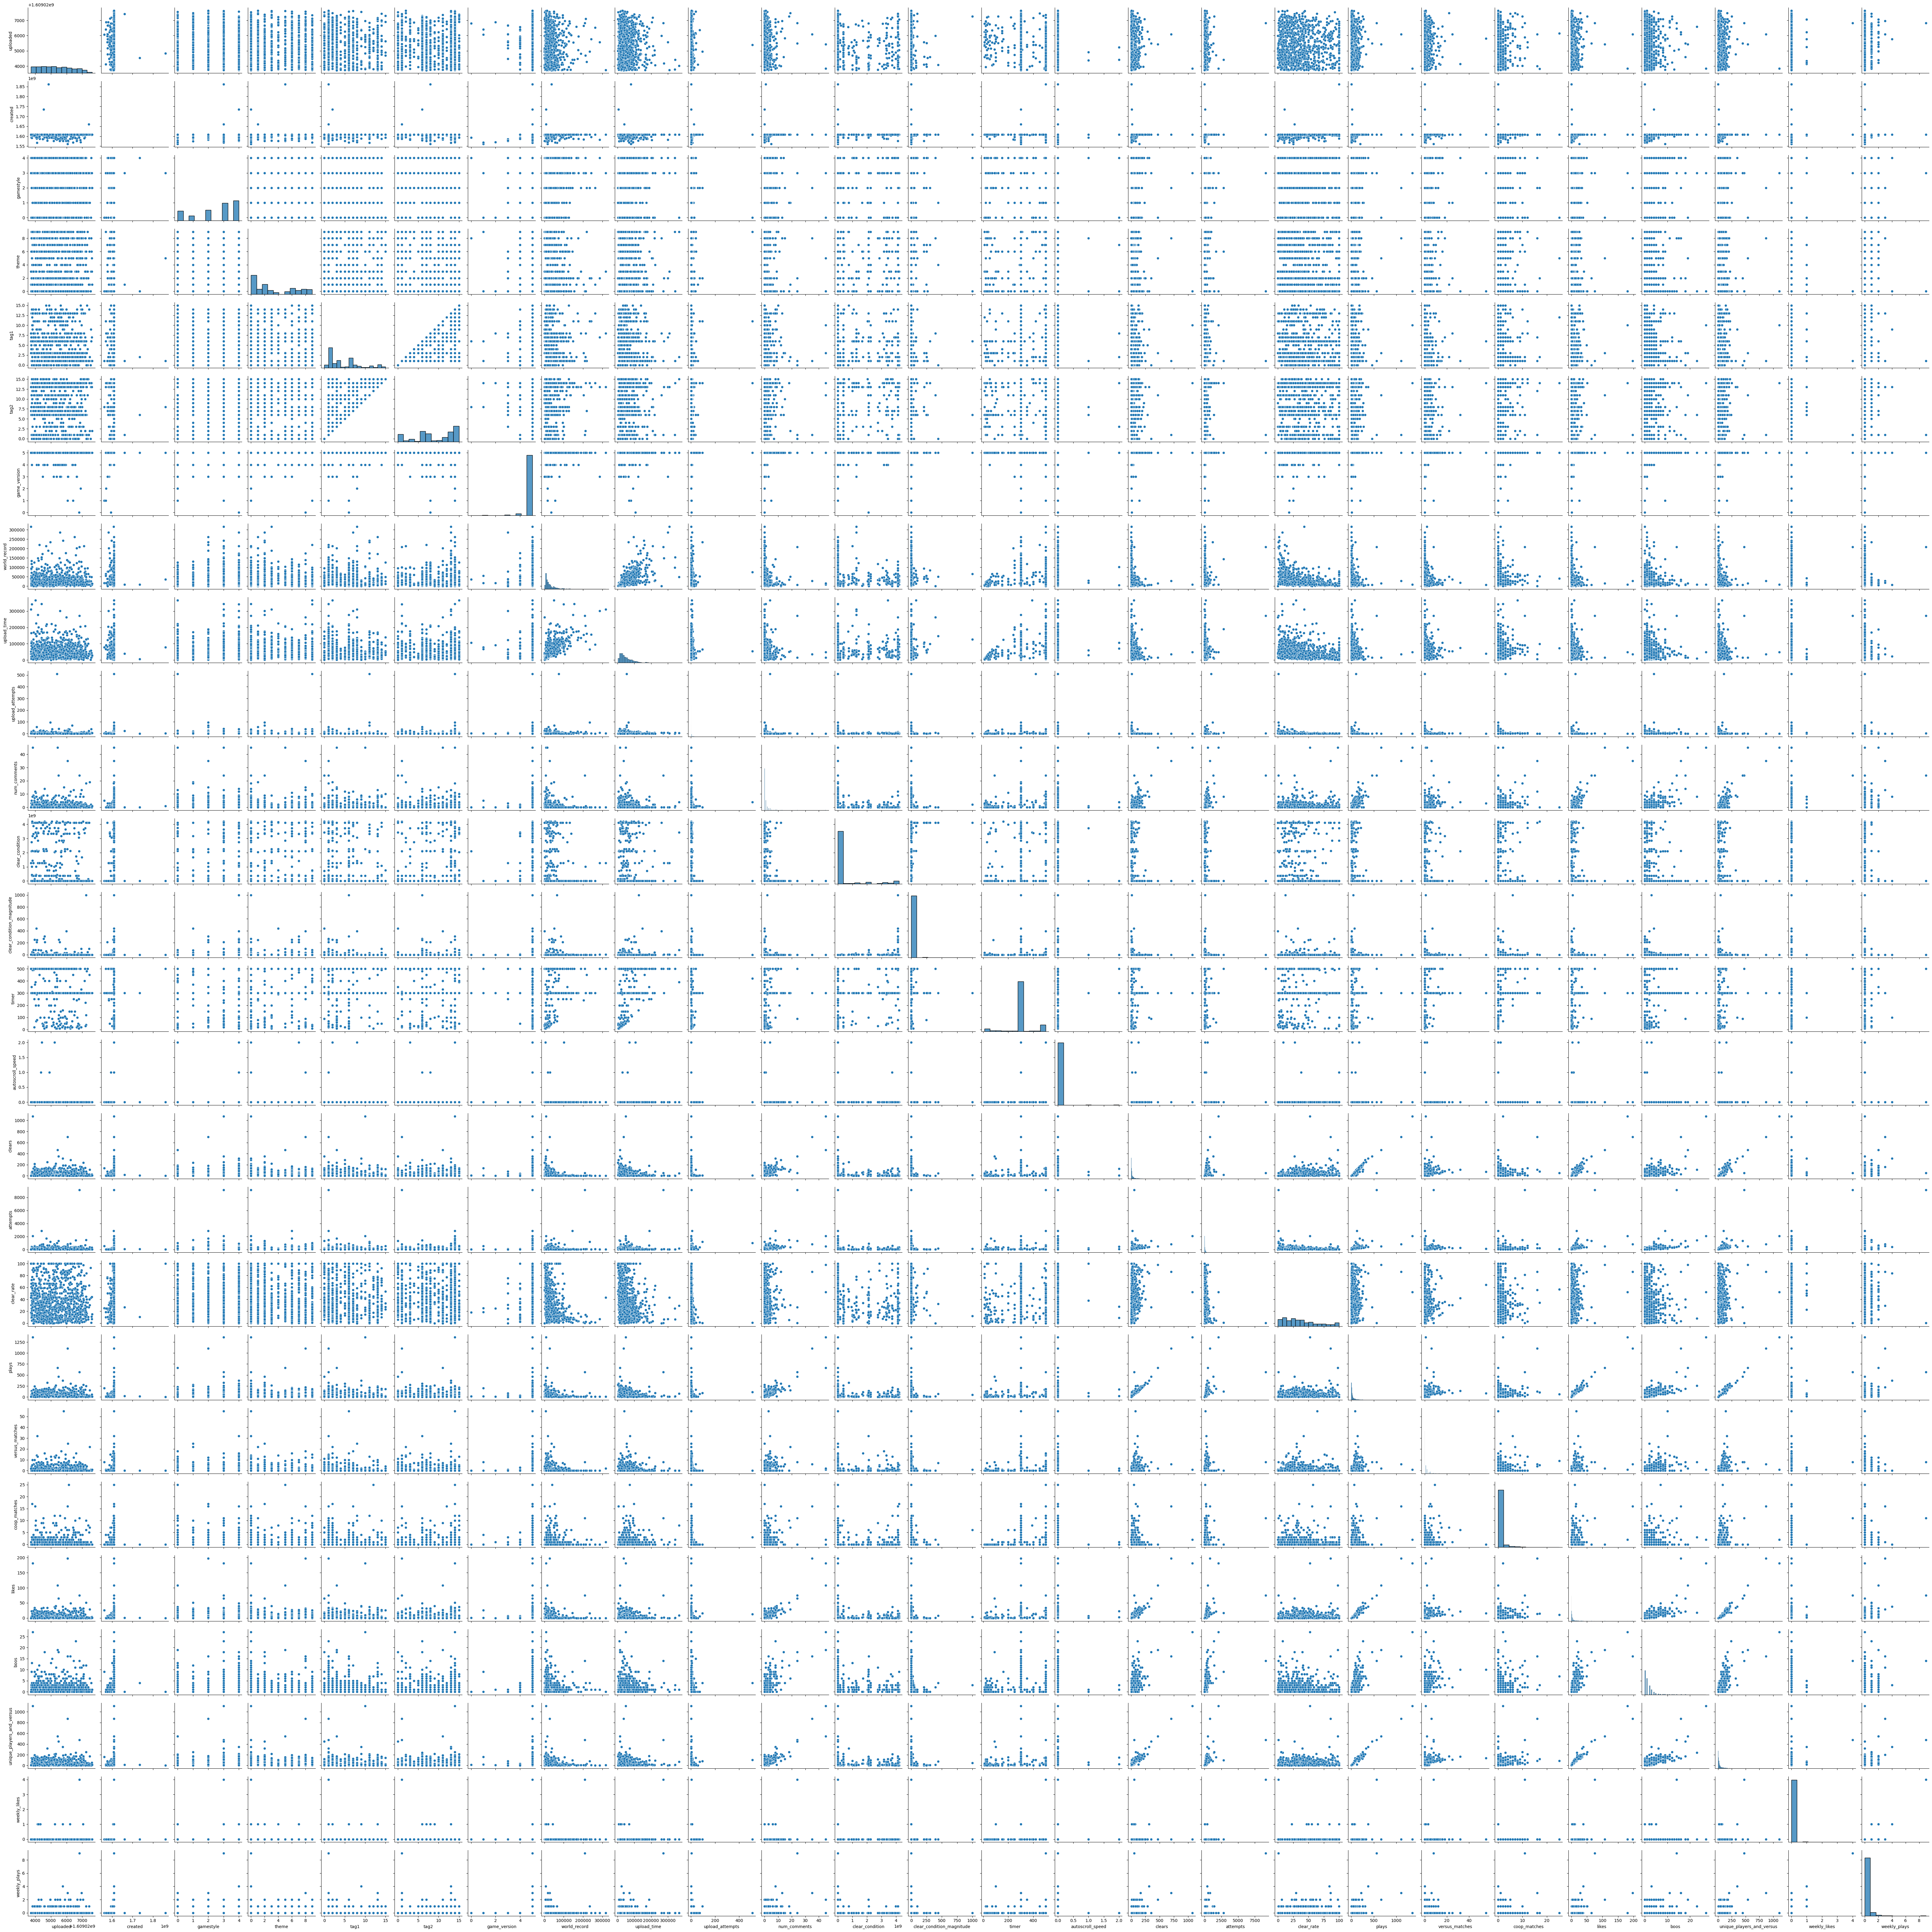

In [ ]:
sns.pairplot(level_data_df)

Finally, data is converted to tensor form and split into training and testing sets.

In [ ]:
#convert to numpy array
X_mat = X_df.to_numpy()
Y_mat = Y_df.to_numpy()
#convert to a PyTorch tensor
X = torch.from_numpy(X_mat)
X = X.double() #convert X to double
Y = torch.from_numpy(Y_mat)

# 80% of data is training, 20% is testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Modelling

Here, the MakeModel function is defined. This function accepts a list of linear neural network layer input and output pairs, a number of epochs to train the network, and the epoch interval to print model loss. It returns a trained neural network model object.

In [ ]:
# Set the number of epochs and the model parameters
def MakeModel(layers, epochs=2000, print_step=200):
  layer_dict = OrderedDict()
  for i in range(0, len(layers)):
    layer_dict[f"lin{i}"] = nn.Linear(in_features=layers[i][0], out_features=layers[i][1], dtype=torch.float64)
    if(i < len(layers) - 1):
      layer_dict[f"relu{i}"] = nn.ReLU()
  model = nn.Sequential(layer_dict)

  # Create a loss function
  loss_fn = nn.MSELoss()

  # Create an optimizer; SGD is stochastic gradient decent
  optimizer = torch.optim.SGD(params=model.parameters(),
                              lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

  for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model.train()

    # 1. Forward pass; makes predictions
    Y_pred = model(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(Y_pred.squeeze(), Y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, Y_test)

    # Print out what's happening
    if epoch % print_step == 0:
      if(epoch == 0):
        previous_loss = loss
      print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}, train loss change: {loss-previous_loss:.5f}")
      previous_loss = loss
  return(model)

The first model will be a simple one. There are 13 predictors and 13 predicted variables for this project, and model_0 will use one hidden layer with two nodes for prediction.

In [ ]:
model_0 = MakeModel(((13, 2), (2, 13)))

Epoch: 0 | Train loss: 16015184701221816.00000, Test loss: 230897528.01597, train loss change: 0.00000
Epoch: 200 | Train loss: 269357524.81171, Test loss: 230374000.12596, train loss change: -16015184431864292.00000
Epoch: 400 | Train loss: 268870900.15910, Test loss: 229853580.20560, train loss change: -486624.65261
Epoch: 600 | Train loss: 268387260.94731, Test loss: 229336249.50662, train loss change: -483639.21179
Epoch: 800 | Train loss: 267906588.86066, Test loss: 228821989.39480, train loss change: -480672.08665
Epoch: 1000 | Train loss: 267428865.69586, Test loss: 228310781.34925, train loss change: -477723.16480
Epoch: 1200 | Train loss: 266954073.36127, Test loss: 227802606.96175, train loss change: -474792.33458
Epoch: 1400 | Train loss: 266482193.87627, Test loss: 227297447.93602, train loss change: -471879.48500
Epoch: 1600 | Train loss: 266013209.37053, Test loss: 226795286.08708, train loss change: -468984.50574
Epoch: 1800 | Train loss: 265547102.08335, Test loss: 2262

Next, a model with two more nodes in its hidden layer will be used.

In [ ]:
model_1 = MakeModel(((13, 4), (4, 13)))

Epoch: 0 | Train loss: 2865562047517697.50000, Test loss: 228037142.87553, train loss change: 0.00000
Epoch: 200 | Train loss: 266540793.37592, Test loss: 227531082.72472, train loss change: -2865561780976904.00000
Epoch: 400 | Train loss: 266071449.36242, Test loss: 227028023.62702, train loss change: -469344.01350
Epoch: 600 | Train loss: 265604984.77306, Test loss: 226527947.48931, train loss change: -466464.58935
Epoch: 800 | Train loss: 265141381.94260, Test loss: 226030836.32853, train loss change: -463602.83047
Epoch: 1000 | Train loss: 264680623.31414, Test loss: 225536672.27095, train loss change: -460758.62846
Epoch: 1200 | Train loss: 264222691.43852, Test loss: 225045437.55155, train loss change: -457931.87562
Epoch: 1400 | Train loss: 263767568.97361, Test loss: 224557114.51329, train loss change: -455122.46491
Epoch: 1600 | Train loss: 263315238.68369, Test loss: 224071685.60653, train loss change: -452330.28992
Epoch: 1800 | Train loss: 262865683.43878, Test loss: 223589

The previous model did not work significantly better than the one with only two nodes, so this one will use 64.

In [ ]:
model_2 = MakeModel(((13, 64), (64, 13)))

Epoch: 0 | Train loss: 37038306287417656.00000, Test loss: 197948952101371922281244094896162480386514508567328601187289858572288.00000, train loss change: 0.00000
Epoch: 200 | Train loss: 45123732848628623785434742304215898648810295787556842766336.00000, Test loss: 45122344436759599512656071938928220028802177388013619773440.00000, train loss change: 45123732848628623785434742304215898648810295787556842766336.00000
Epoch: 400 | Train loss: 44846898879764549246563785293502277082354469398753149190144.00000, Test loss: 44845518985798283426205552025281375554546170764530143985664.00000, train loss change: -276833968864074538870957010713621566455826388803693576192.00000
Epoch: 600 | Train loss: 44571763286488670796742501129639839991247617429529205669888.00000, Test loss: 44570391858167843930646794648892423079130937529933638926336.00000, train loss change: -275135593275878449821284163862437091106851969223943520256.00000
Epoch: 800 | Train loss: 4429831564927168902644908464077981603312716947280

64 nodes in the single hidden layer did far worse than the model with two or four nodes. The next will use a series of several layers

In [ ]:
model_3 = MakeModel(((13, 64), (64, 32), (32, 64), (64, 16), (16, 13)))

Epoch: 0 | Train loss: 197221293978948.37500, Test loss: 31410142199108862461065691227964885373017261187453637811603863484251487277859866162208723385334819617439991046787301376.00000, train loss change: 0.00000
Epoch: 200 | Train loss: nan, Test loss: nan, train loss change: nan
Epoch: 400 | Train loss: nan, Test loss: nan, train loss change: nan
Epoch: 600 | Train loss: nan, Test loss: nan, train loss change: nan
Epoch: 800 | Train loss: nan, Test loss: nan, train loss change: nan
Epoch: 1000 | Train loss: nan, Test loss: nan, train loss change: nan
Epoch: 1200 | Train loss: nan, Test loss: nan, train loss change: nan
Epoch: 1400 | Train loss: nan, Test loss: nan, train loss change: nan
Epoch: 1600 | Train loss: nan, Test loss: nan, train loss change: nan
Epoch: 1800 | Train loss: nan, Test loss: nan, train loss change: nan


Much larger layers didn't seem to work very well. Instead, the single 2-node layer model will be run for longer.

In [ ]:
model_4 = MakeModel(((13, 2), (2, 13)), 100000, 10000)

Epoch: 0 | Train loss: 9397921730816992.00000, Test loss: 225587845.14777, train loss change: 0.00000
Epoch: 10000 | Train loss: 244953040.80384, Test loss: 204257873.42501, train loss change: -9397921485863952.00000
Epoch: 20000 | Train loss: 230408246.11111, Test loss: 188388405.11987, train loss change: -14544794.69273
Epoch: 30000 | Train loss: 219715789.51367, Test loss: 176560114.80341, train loss change: -10692456.59744
Epoch: 40000 | Train loss: 211855339.74429, Test loss: 167725757.68023, train loss change: -7860449.76937
Epoch: 50000 | Train loss: 206076810.73987, Test loss: 161112168.11163, train loss change: -5778529.00443
Epoch: 60000 | Train loss: 201828784.42653, Test loss: 156148136.70682, train loss change: -4248026.31334
Epoch: 70000 | Train loss: 198705891.46449, Test loss: 152411322.91904, train loss change: -3122892.96203
Epoch: 80000 | Train loss: 196410128.74247, Test loss: 149589170.94984, train loss change: -2295762.72202
Epoch: 90000 | Train loss: 194722422.33

Model 4 has a final test loss below 150 million, but progress is slowing each 10000 epochs. Next, a second layer will be added.

In [ ]:
model_5 = MakeModel(((13, 2), (2, 4), (4, 13)), 100000, 10000)

Epoch: 0 | Train loss: 292291990856490.25000, Test loss: 228374066.56510, train loss change: 0.00000
Epoch: 10000 | Train loss: 246853510.28337, Test loss: 206330725.04614, train loss change: -292291744002979.93750
Epoch: 20000 | Train loss: 231805356.75130, Test loss: 189933323.85836, train loss change: -15048153.53207
Epoch: 30000 | Train loss: 220742861.06728, Test loss: 177713922.70561, train loss change: -11062495.68401
Epoch: 40000 | Train loss: 212610380.85979, Test loss: 168589466.77287, train loss change: -8132480.20749
Epoch: 50000 | Train loss: 206631871.46966, Test loss: 161760403.92104, train loss change: -5978509.39014
Epoch: 60000 | Train loss: 202236831.62744, Test loss: 156636074.57972, train loss change: -4395039.84222
Epoch: 70000 | Train loss: 199005863.17792, Test loss: 152779794.66170, train loss change: -3230968.44952
Epoch: 80000 | Train loss: 196630649.87007, Test loss: 149868425.32993, train loss change: -2375213.30785
Epoch: 90000 | Train loss: 194884536.1750

In [ ]:
model_6 = MakeModel(((13, 2), (2, 8), (8, 13)), 100000, 10000)

Epoch: 0 | Train loss: 449762516755347.12500, Test loss: 227296541.55384, train loss change: 0.00000
Epoch: 10000 | Train loss: 190038065.16550, Test loss: 140051823.56848, train loss change: -449762326717281.93750
Epoch: 20000 | Train loss: 190038065.16550, Test loss: 140051823.56848, train loss change: 0.00000
Epoch: 30000 | Train loss: 190038065.16550, Test loss: 140051823.56848, train loss change: 0.00000
Epoch: 40000 | Train loss: 190038065.16550, Test loss: 140051823.56848, train loss change: 0.00000
Epoch: 50000 | Train loss: 190038065.16550, Test loss: 140051823.56848, train loss change: 0.00000
Epoch: 60000 | Train loss: 190038065.16550, Test loss: 140051823.56848, train loss change: 0.00000
Epoch: 70000 | Train loss: 190038065.16550, Test loss: 140051823.56848, train loss change: 0.00000
Epoch: 80000 | Train loss: 190038065.16550, Test loss: 140051823.56848, train loss change: 0.00000
Epoch: 90000 | Train loss: 190038065.16550, Test loss: 140051823.56848, train loss change: 0

Model 5 and 6 performed similarly to the fourth. Model 6, when initially run, quickly acheived a training loss nearly that of the final training loss of Model 4, then was unable to decrease loss further. Model 4 will be evaluated via graph.

In [ ]:
def EvaluateModel(model):
  # Turn on evaluation mode
  model.eval()

  # Make predictions (inference)
  with torch.inference_mode():
      Y_preds = model(X_test)

  #plots test data
  plt.scatter(X_test.detach().numpy(),Y_test.detach().numpy(), color="blue")

  #plots predictions--remember, our model has never seen X_test
  plt.scatter(X_test.detach().numpy(),Y_preds.detach().numpy(), color="orange")

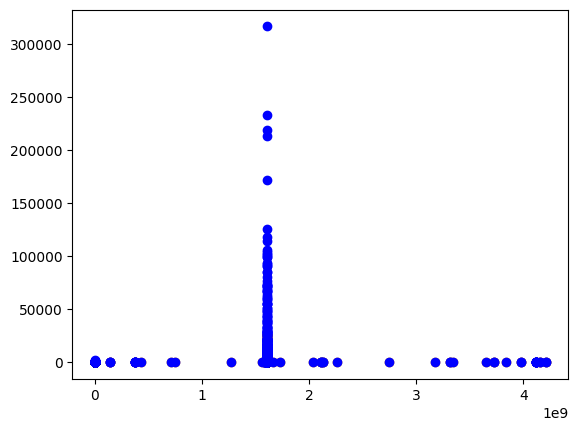

In [ ]:
EvaluateModel(model_4)

The prediction and test data are indistinguishable on the plot. However, the data itself is in a very strange T-shape. The data may need to be cleaned.

In [ ]:
#500000
level_data_df.query("world_record <= 500000", inplace=True)

In [ ]:
#convert to numpy array
X_mat = X_df.to_numpy()
Y_mat = Y_df.to_numpy()
#convert to a PyTorch tensor
X = torch.from_numpy(X_mat)
X = X.double() #convert X to double
Y = torch.from_numpy(Y_mat)

# 80% of data is training, 20% is testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
model_7 = MakeModel(((13, 2), (2, 13)), 100000, 10000)

Epoch: 0 | Train loss: 2363086947915533.00000, Test loss: 175143666.86469, train loss change: 0.00000
Epoch: 10000 | Train loss: 263021143.99401, Test loss: 153918048.69813, train loss change: -2363086684894389.00000
Epoch: 20000 | Train loss: 246365862.76245, Test loss: 138489043.60456, train loss change: -16655281.23156
Epoch: 30000 | Train loss: 234121903.63832, Test loss: 127296434.54710, train loss change: -12243959.12413
Epoch: 40000 | Train loss: 225120882.70394, Test loss: 119196798.15276, train loss change: -9001020.93438
Epoch: 50000 | Train loss: 218503874.50914, Test loss: 113352605.81957, train loss change: -6617008.19480
Epoch: 60000 | Train loss: 213639448.82129, Test loss: 109150769.80346, train loss change: -4864425.68785
Epoch: 70000 | Train loss: 210063416.18298, Test loss: 106142825.17462, train loss change: -3576032.63831
Epoch: 80000 | Train loss: 207434532.47689, Test loss: 104001008.32512, train loss change: -2628883.70609
Epoch: 90000 | Train loss: 205501935.59

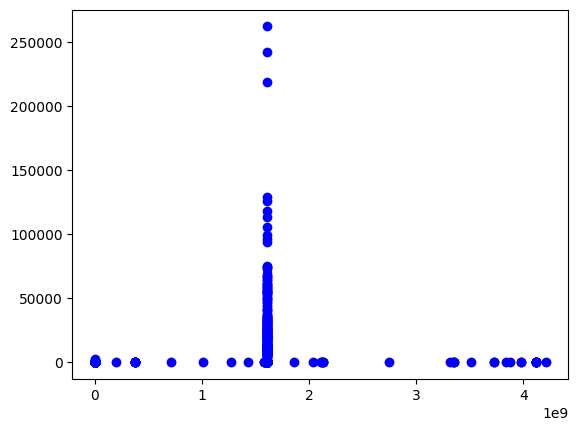

In [ ]:
EvaluateModel(model_7)

Epoch: 0 | Train loss: 128917011188677.98438, Test loss: 321061762.50501, train loss change: 0.00000
Epoch: 10000 | Train loss: 223370910.01507, Test loss: 299712483.13734, train loss change: -128916787817767.96875
Epoch: 20000 | Train loss: 207977094.24096, Test loss: 283967659.14758, train loss change: -15393815.77411
Epoch: 30000 | Train loss: 196660488.50600, Test loss: 272350040.03881, train loss change: -11316605.73496
Epoch: 40000 | Train loss: 188341201.90158, Test loss: 263772621.12128, train loss change: -8319286.60443
Epoch: 50000 | Train loss: 182225363.70525, Test loss: 257435428.23353, train loss change: -6115838.19632
Epoch: 60000 | Train loss: 177729368.00008, Test loss: 252749619.36575, train loss change: -4495995.70517
Epoch: 70000 | Train loss: 174424182.88366, Test loss: 249281670.97884, train loss change: -3305185.11642
Epoch: 80000 | Train loss: 171994409.95455, Test loss: 246712331.91506, train loss change: -2429772.92911
Epoch: 90000 | Train loss: 170208187.3137

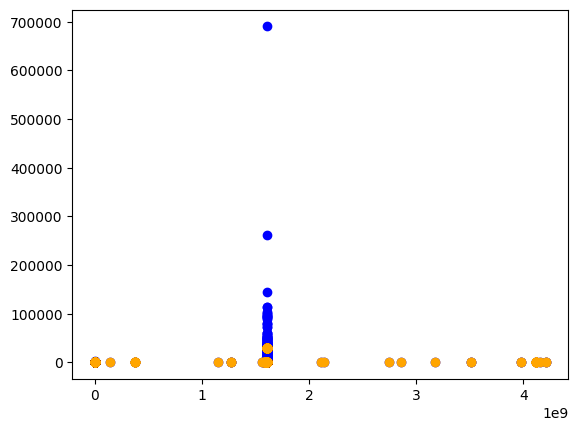

In [ ]:
model_8 = MakeModel(((13, 2), (2, 13)), 150000, 10000)
EvaluateModel(model_8)

The attempt at cleaning overly large values out of the data did not fix the strange data shape. Running the model for 50000 more epochs did not give it a massively lower loss either. The model seems to be doing a good job at predicting the data in the lower, horizontal line, but predicting the data in the near-vertical line seems much more difficult for it. It may be that predicting this set of variables is too complex a task for a simple neural network model or that it is difficult to gauge how the neural network is predicting all of the chosen variables at once.